<a href="https://colab.research.google.com/github/Basma2423/CNN-Horses-or-Humans/blob/main/CNN_Horses_or_Humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From **AI and ML for Coders** book
# Chapter 3: Building a CNN to Distinguish Between Horses and Humans
<img src="https://m.media-amazon.com/images/I/81z-5cK1v1L._AC_UF1000,1000_QL80_.jpg" alt="Book Cover" width="400">


In [63]:
import urllib.request
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from PIL import Image
import io
import numpy as np

In [ ]:
@ONLINE {horses_or_humans,
author = "Laurence Moroney",
title = "Horses or Humans Dataset",
month = "feb",
year = "2019",
url = "http://laurencemoroney.com/horses-or-humans-dataset"
}

## Get the Training Dataset

In [36]:
url = 'https://storage.googleapis.com/learning-datasets/horse-or-human.zip'
file_name = 'horse-or-human.zip'
training_dir = 'horse-or-human/train/'

In [37]:
# Download the zip file from the specified URL and save it locally
urllib.request.urlretrieve(url, file_name)

('horse-or-human.zip', <http.client.HTTPMessage at 0x78ff1352ff10>)

In [19]:
# Open the downloaded zip file in read mode
zip_ref = zipfile.ZipFile(file_name, 'r')

In [21]:
# Extract all the contents of the zip file into the specific directory
zip_ref.extractall(training_dir)

In [22]:
# Close the zip file
zip_ref.close()

## Label the Training Data using ImageDataGenerator

In [24]:
# Rescale the images by 1/255
train_datagen = ImageDataGenerator(rescale=1/255)

# Get and Assign the labels to the images
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300,300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


## Get the Validation Dataset

In [34]:
validation_file_name = 'validation-horse-or-human.zip'
validation_dir = 'horse-or-human/valid/'

In [38]:
# Download the zip file from the specified URL and save it locally
urllib.request.urlretrieve(url, validation_file_name)

('validation-horse-or-human.zip', <http.client.HTTPMessage at 0x78ff200999f0>)

In [40]:
# Open the downloaded zip file in read mode
zip_ref = zipfile.ZipFile(validation_file_name, 'r')

In [41]:
# Extract all the contents of the zip file into the specific directory
zip_ref.extractall(validation_dir)

In [42]:
# Close the zip file
zip_ref.close()

## Label the Training Data using ImageDataGenerator

In [43]:
# Rescale the images by 1/255
validation_datagen = ImageDataGenerator(rescale=1/255)

# Get and Assign the labels to the images
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300,300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


## The CNN Architecture

In [46]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu',
           input_shape=(300,300,3)),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 35, 35, 64)       

In [48]:
model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [49]:
history = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

<ipython-input-49-ec0f69ad9ab0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
33/33 [==============================] - 144s 4s/step - loss: 0.6937 - accuracy: 0.5784 - val_loss: 0.3431 - val_accuracy: 0.9231
Epoch 2/15
33/33 [==============================] - 146s 4s/step - loss: 0.4302 - accuracy: 0.8257 - val_loss: 0.2000 - val_accuracy: 0.9279
Epoch 3/15
33/33 [==============================] - 136s 4s/step - loss: 0.2110 - accuracy: 0.9182 - val_loss: 0.1125 - val_accuracy: 0.9630
Epoch 4/15
33/33 [==============================] - 136s 4s/step - loss: 0.1780 - accuracy: 0.9377 - val_loss: 0.0690 - val_accuracy: 0.9737
Epoch 5/15
33/33 [==============================] - 135s 4s/step - loss: 0.0679 - accuracy: 0.9747 - val_loss: 0.0153 - val_accuracy: 0.9951
Epoch 6/15
33/33 [==============================] - 137s 4s/step - loss: 0.1992 - accuracy: 0.9591 - val_loss: 0.0135 - val_accuracy: 0.9942
Epoch 7/15
33/33 [==============================] - 135s 4s/step - loss: 0.0382 - accuracy: 0.9854 - val_loss: 0.0313 - val_accuracy: 0.9873
Epoch 8/15
33

## Test it with 3 pictures from the internet

In [69]:
def predict(img):
  img = img.resize((300, 300), Image.ANTIALIAS)
  image = np.array(img)
  image = np.expand_dims(image, axis=0)

  image_tensor = np.vstack([image])
  classes = model.predict(image_tensor)

  if classes[0] > 0.5:
    return 'Human'
  else:
    return 'Horse'

In [65]:
image_urls = ['https://i.natgeofe.com/n/56ad4f59-e256-42b1-bf7c-d04193068703/horse_thumb_3x4.jpg',
              'https://m.media-amazon.com/images/M/MV5BNDI2MGQ1YWEtMTc4Mi00NGViLWIyODEtZjA2OWFhNzM3NmRlXkEyXkFqcGdeQXVyNTE0NDY3MDk@._V1_.jpg',
              'https://img.freepik.com/free-photo/young-beautiful-woman-pink-warm-sweater-natural-look-smiling-portrait-isolated-long-hair_285396-896.jpg']

<ipython-input-69-8a3f6bb7addb>:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((300, 300), Image.ANTIALIAS)


1/1 [==============================] - 0s 59ms/step


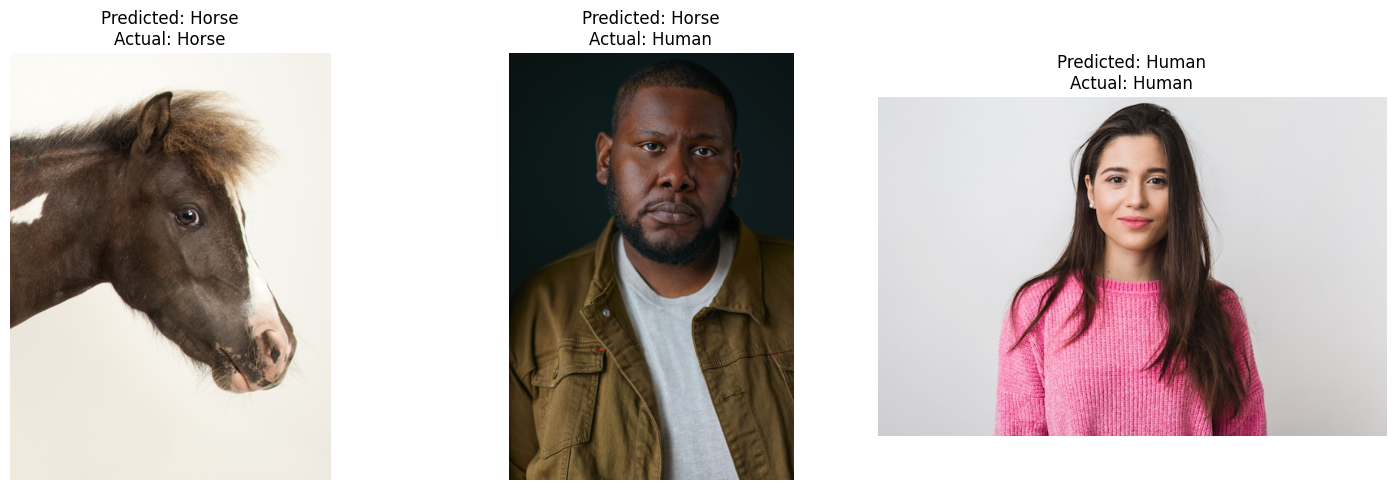

In [73]:
num_of_images = len(image_urls)
predicted_labels = []
actual_labels = ['Horse', 'Human', 'Human']

fig, axes = plt.subplots(1, num_of_images, figsize=(num_of_images * 5, 5))

for i, url in enumerate(image_urls):
  with urllib.request.urlopen(url) as img_url:
    image_data = img_url.read()

  image = Image.open(io.BytesIO(image_data))
  prediction = predict(image)
  predicted_labels.append(prediction)
  axes[i].imshow(image)
  axes[i].axis('off')
  axes[i].set_title(f'Predicted: {prediction}\nActual: {actual_labels[i]}')

plt.tight_layout()
plt.show()

In [74]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
